In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
df=pd.read_csv('data_to_be_cleansed.csv')
df 


,Unnamed: 0,text,title,target
0,0,Welcome to /r/depression's check-in post - a p...,"Regular check-in post, with information about ...",1
1,1,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
2,2,Anyone else just miss physical touch? I crave ...,"I haven’t been touched, or even hugged, in so ...",1
3,3,I’m just so ashamed. Everyone and everything f...,Being Depressed is Embarrassing,1
4,4,I really need a friend. I don't even have a si...,I'm desperate for a friend and to feel loved b...,1
...,...,...,...,...
5952,1183,I’ve (24M) dealt with depression/anxiety for y...,Nobody takes me seriously,4
5953,1184,"""I don't feel very good, it's like I don't be...",selfishness,4
5954,1185,"I can't sleep most of the nights, meds didn't ...",Is there any way to sleep better?,4
5955,1186,"Hi, all. I have to give a presentation at work...",Public speaking tips?,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5957 entries, 0 to 5956
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5957 non-null   int64 
 1   text        5607 non-null   object
 2   title       5957 non-null   object
 3   target      5957 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 186.3+ KB


In [5]:
df.isnull().sum()

Unnamed: 0      0
text          350
title           0
target          0
dtype: int64

In [6]:
data_clean=df.dropna(subset=['text']).reset_index(drop=True)
data_clean

,Unnamed: 0,text,title,target
0,0,Welcome to /r/depression's check-in post - a p...,"Regular check-in post, with information about ...",1
1,1,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
2,2,Anyone else just miss physical touch? I crave ...,"I haven’t been touched, or even hugged, in so ...",1
3,3,I’m just so ashamed. Everyone and everything f...,Being Depressed is Embarrassing,1
4,4,I really need a friend. I don't even have a si...,I'm desperate for a friend and to feel loved b...,1
...,...,...,...,...
5602,1183,I’ve (24M) dealt with depression/anxiety for y...,Nobody takes me seriously,4
5603,1184,"""I don't feel very good, it's like I don't be...",selfishness,4
5604,1185,"I can't sleep most of the nights, meds didn't ...",Is there any way to sleep better?,4
5605,1186,"Hi, all. I have to give a presentation at work...",Public speaking tips?,4


In [7]:
data_clean.isnull().sum()

Unnamed: 0    0
text          0
title         0
target        0
dtype: int64

In [8]:
c_data='cleaned_data1.csv'
data_clean.to_csv(c_data,index=False)


/var/folders/4f/bfbg_2vn7pz5p7b5pnh_64th0000gn/T/ipykernel_93429/2725164548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_clean, x='target', palette='viridis')


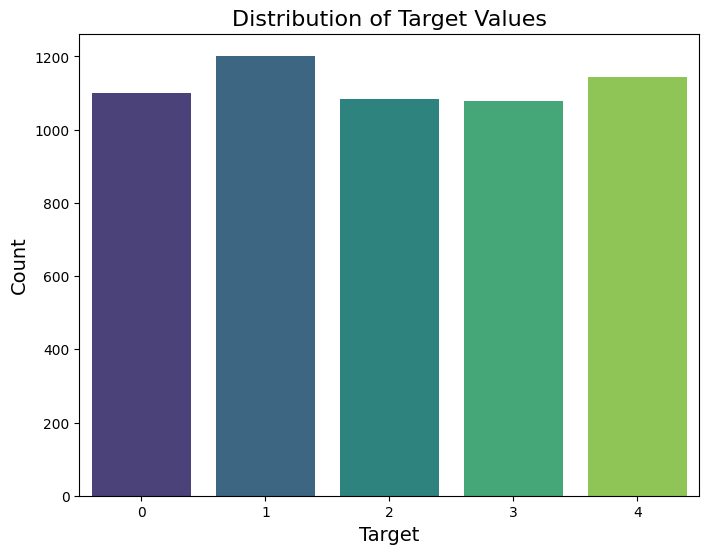

In [9]:


plt.figure(figsize=(8, 6))
sns.countplot(data=data_clean, x='target', palette='viridis')
plt.title('Distribution of Target Values', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

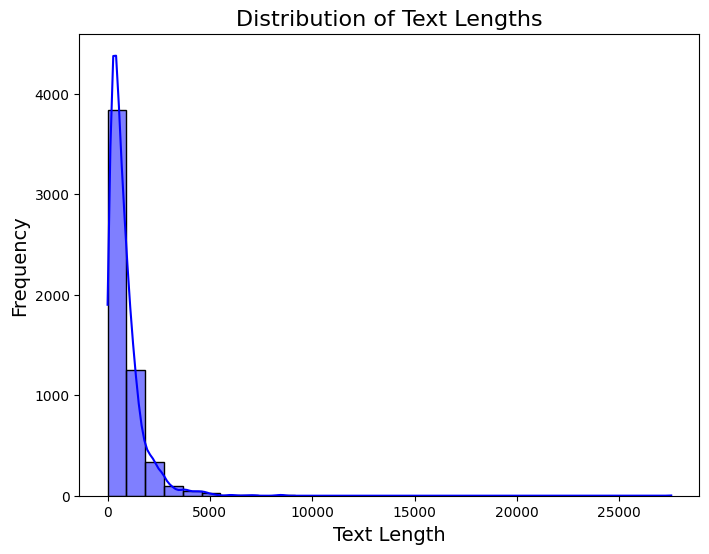

In [10]:
## total distribution of text column
data_clean['text_length'] = data_clean['text'].str.len()  # Calculate text lengths
plt.figure(figsize=(8, 6))
sns.histplot(data_clean['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

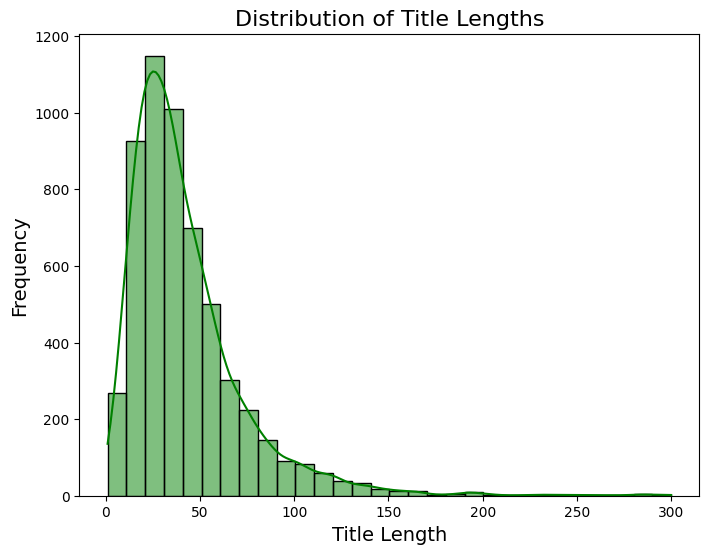

In [11]:
data_clean['title_length'] = data_clean['title'].str.len() 
plt.figure(figsize=(8, 6))
sns.histplot(data_clean['title_length'], bins=30, kde=True, color='green')
plt.title('Distribution of Title Lengths', fontsize=16)
plt.xlabel('Title Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

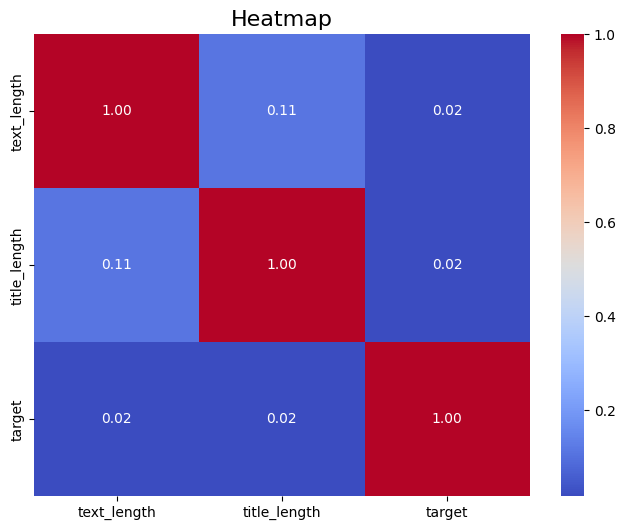

In [12]:
## corealtion map
plt.figure(figsize=(8, 6))
corr = data_clean[['text_length', 'title_length', 'target']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap', fontsize=16)
plt.show()


In [13]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_emojis(text):
    emoji_pattern = re.compile("[\U0001F600-\U0001F64F"
                               "\U0001F300-\U0001F5FF"
                               "\U0001F680-\U0001F6FF"
                               "\U0001F700-\U0001F77F"
                               "\U0001F780-\U0001F7FF"
                               "\U0001F800-\U0001F8FF"
                               "\U0001F900-\U0001F9FF"
                               "\U0001FA00-\U0001FA6F"
                               "\U0001FA70-\U0001FAFF"
                               "\U00002702-\U000027B0"
                               "\U000024C2-\U0001F251]", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def apply_regular_expressions(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

def preprocess_text(text):
    if not isinstance(text, str):  
        return ''
    text = text.lower()
    text = remove_emojis(text)
    text = apply_regular_expressions(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(tokens)


data_clean = pd.read_csv('cleaned_data1.csv')


columns_to_process = ['text', 'title']  


for col in columns_to_process:
    if col in data_clean.columns:
        data_clean[col] = data_clean[col].apply(preprocess_text)


c_data = 'finaldata_clean.csv'
data_clean.to_csv(c_data, index=False)

print(f"data to processed {c_data}")


[nltk_data] Downloading package punkt to /Users/mahesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mahesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


data to processed finaldata_clean.csv


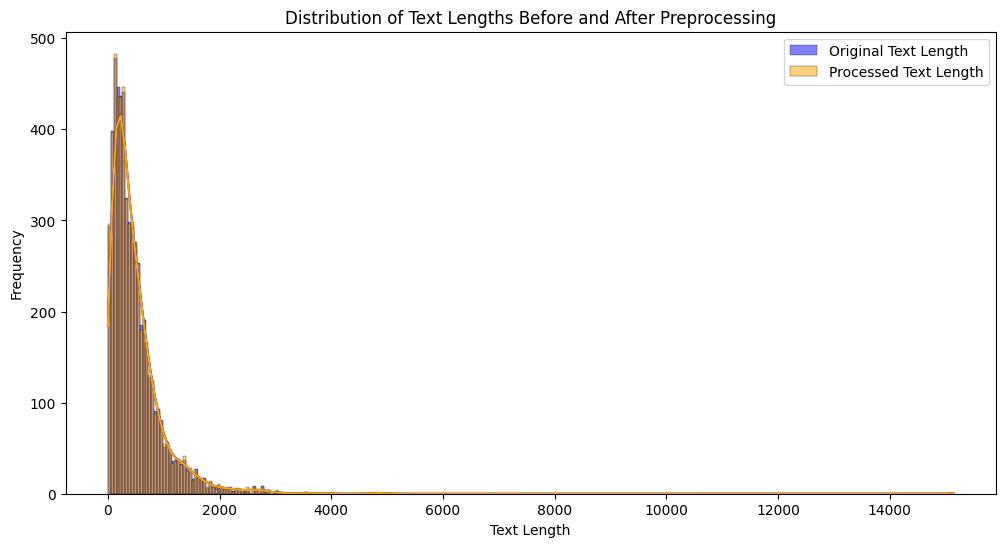

Text(0.5, 1.0, 'Most Frequent Word')

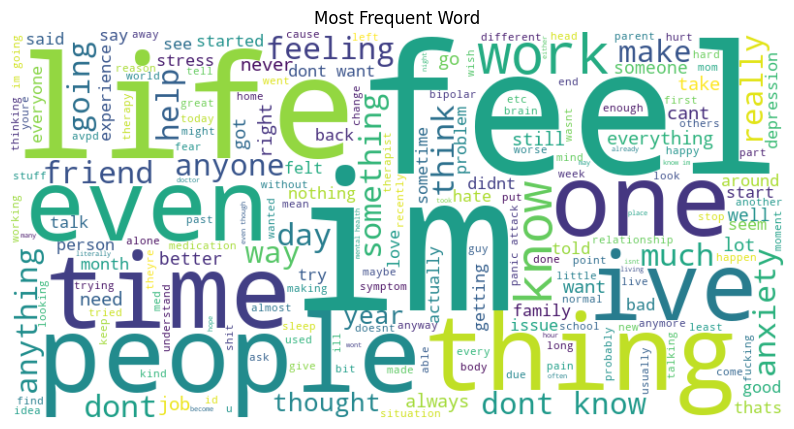

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


data_clean['original_text_length'] = data_clean['text'].apply(lambda x: len(x))
data_clean['processed_text_length'] = data_clean['text'].apply(lambda x: len(preprocess_text(x)))

plt.figure(figsize=(12, 6))
sns.histplot(data_clean['original_text_length'], kde=True, label='Original Text Length', color='blue', alpha=0.5)
sns.histplot(data_clean['processed_text_length'], kde=True, label='Processed Text Length', color='orange', alpha=0.5)
plt.title('Distribution of Text Lengths Before and After Preprocessing')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


cleaned_text = data_clean['text'].apply(preprocess_text)

all_text = ' '.join(cleaned_text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Word')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


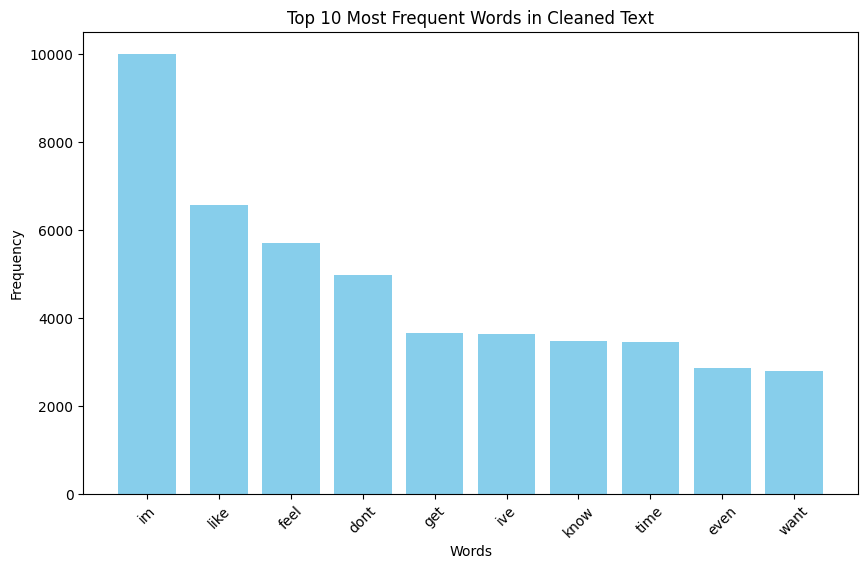

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')


stop_words = set(stopwords.words('english'))

cleaned_text = data_clean['text'].apply(preprocess_text)


all_cleaned_text = ' '.join(cleaned_text)

tokens = word_tokenize(all_cleaned_text)


tokens = [word for word in tokens if word not in stop_words and word.isalpha()]


word_counts = Counter(tokens)


most_common_words = word_counts.most_common(10)

words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Frequent Words in Cleaned Text')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
